### NAME : HARDIK PAREEK

### The Sparks Foundation

Task 1: Prediction Using Supervised Machine Learning

In this regression task I will predict the percentage of marks that a student is expected to score based upon the number of hours they studied using simple Linear Regression.

In [2]:
## Importing the required libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [4]:
# Loading the data
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")

data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


As we can see that the data is loaded successfully, now lets perform some other functions on our data.

The shape of our data is

In [5]:
data.shape

(25, 2)

So we can see that our data has a total of 25 rows and 2 columns where column 1 is for the hours studied and column 2 is for the marks scored.

Summary of Data

In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


From this summary of data we can see that the minimum marks scored by a student is 17 whereas the maximum is 95. Also we can see that the student studied a minimum of 1.1 hour at the same time maximum of 9.2 hours.

### Data Visualization
Now let us visualize this data for a better understanding of the correlation between the variables.

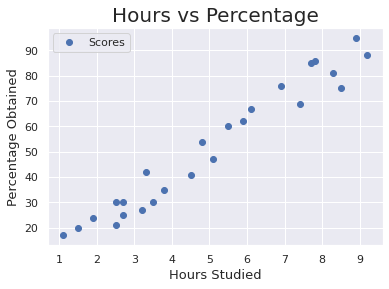

In [7]:
# Scatter Plot
data.plot(x='Hours' , y='Scores' , style='o')
plt.title('Hours vs Percentage',fontsize=20)
plt.xlabel('Hours Studied',fontsize=13)
plt.ylabel('Percentage Obtained',fontsize=13)
plt.show()


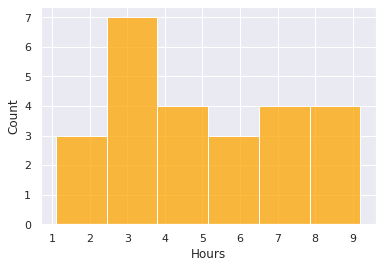

In [8]:

sns.histplot(data['Hours'], color = 'orange')

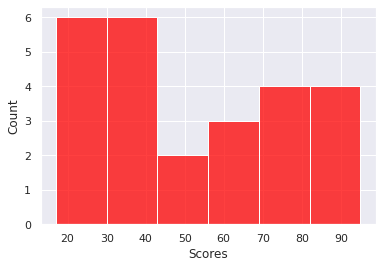

In [9]:
sns.histplot(data['Scores'], color = 'red')

The above two histogram plots are for hours studied and marks scored respectively.

## Data Preprocessing
Dividing independent and dependent variables

In [11]:
x= data.iloc[:,:-1].values
y=data.iloc[:,1].values

Splitting the data into test and training sets

Now I am going to split this data into training and test sets using train_test_split() method.

In [13]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [14]:
from sklearn.linear_model import LinearRegression
clr= LinearRegression()
clr.fit(x_train,y_train)  #fitting our  model using clr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

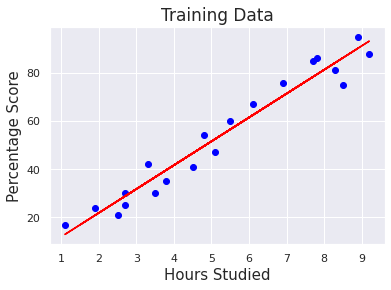

In [15]:
line= clr.coef_*x + clr.intercept_

plt.scatter(x_train,y_train, color='blue')
plt.title('Training Data', fontsize = 17)
plt.xlabel('Hours Studied', fontsize = 15)  
plt.ylabel('Percentage Score', fontsize = 15) 
plt.plot(x, line,color='red')
plt.show()

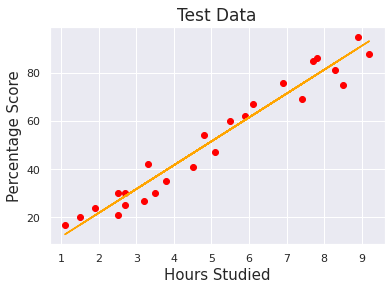

In [16]:
line= clr.coef_*x + clr.intercept_

plt.scatter(x,y, color='red')
plt.title('Test Data', fontsize = 17)
plt.xlabel('Hours Studied', fontsize = 15)  
plt.ylabel('Percentage Score', fontsize = 15) 
plt.plot(x, line,color='orange')
plt.show()

In [17]:
y_pred = clr.predict(x_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [18]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


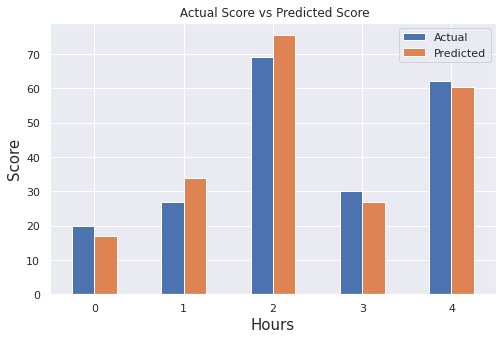

In [19]:
df.plot(kind='bar',figsize=(8,5))
plt.title(' Actual Score vs Predicted Score')
plt.ylabel('Score', fontsize = 15)
plt.xlabel('Hours', fontsize = 15)
plt.xticks(rotation = 0)
plt.show()

In [20]:
hours = 9.25
test = np.array([hours])
test = test.reshape(-1, 1) #.predict()unction aways expects 2D array
own_pred = clr.predict(test)
print("No of Hours Studied = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours Studied = 9.25
Predicted Score = 93.69173248737539


## Evaluating the model
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset.

Evaluating the model using the most common performance metrics

In [21]:
from sklearn import metrics
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))
print('Mean Absolute Error:' , metrics.mean_absolute_error(y_test,y_pred))

Mean Squared Error: 21.598769307217456
Mean Absolute Error: 4.183859899002982


# Conclusion
I successfully predicted the percentage score of student based on the no.of study hours using Supervised Machine Learning